In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl
import sys

import hydra
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torchaudio
import lightning.pytorch as pl
from scipy.stats import gaussian_kde
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import numpy as np


from IPython.display import Audio, display

from pathlib import Path
from egaznepy.visualize import apply_plot_style
from src.data.mocha_timit_datamodule import MTIMITDataModule
from src.models.pitch_module import PitchModule
from src.models.components.extractors import XCorrExt
from opus_binding import LibOPUSBinding
 
from src.models.components.metrics import RCAMetric
from torchmetrics.classification.accuracy import Accuracy



apply_plot_style(0.9)
plt.rcParams['text.usetex'] = False

root_dir = Path(globals()['_dh'][0]).parent
print(root_dir)
import os
os.chdir(root_dir)
#os.environ['CUDA_VISIBLE_DEVICES'] = '0'

config_path_predict_cc = 'logs/train/runs/2024-07-23_15-17-46_cc_timit_with_reduced_cc/.hydra/config.yaml'
ckpt_path_cc = 'logs/train/runs/2024-07-23_15-17-46_cc_timit_with_reduced_cc/checkpoints/epoch_010.ckpt'

config_path_predict_cc_without_lpc = 'logs/train/runs/2024-07-30_11-54-25_cc_without_lpc/.hydra/config.yaml'
ckpt_path_cc_without_lpc = 'logs/train/runs/2024-07-30_11-54-25_cc_without_lpc/checkpoints/epoch_085.ckpt'

        
config_path_eval_amazon = "logs/eval/runs/2024-07-30_15-38-56/.hydra/config.yaml"

/dataHDD/chsaikeerthi/2024-chirumamilla


In [2]:
config_predict_cc = OmegaConf.load(config_path_predict_cc)
datamodule = hydra.utils.instantiate(config_predict_cc.data, slice=False, batch_size=4, slice_length=1)
pitch_module_cc: PitchModule = hydra.utils.instantiate(config_predict_cc.model)

config_eval_amazon = OmegaConf.load(config_path_eval_amazon)
datamodule_eval = hydra.utils.instantiate(config_eval_amazon.data, slice=False, batch_size=4)
amazon_module: PitchModule = hydra.utils.instantiate(config_eval_amazon.model)

config_predict_cc_wo_lpc = OmegaConf.load(config_path_predict_cc)
datamodule_wo_lpc = hydra.utils.instantiate(config_predict_cc_wo_lpc.data, slice=False, batch_size=4, slice_length=1)
pitch_module_cc_wo_lpc: PitchModule = hydra.utils.instantiate(config_predict_cc_wo_lpc.model)



del config_predict_cc.trainer.default_root_dir
del config_eval_amazon.trainer.default_root_dir
del config_predict_cc_wo_lpc.trainer.default_root_dir

config_predict_cc.trainer.limit_predict_batches = 1
config_predict_cc_wo_lpc.trainer.limit_predict_batches = 1

ext = XCorrExt()
libopus = LibOPUSBinding()




trainer = hydra.utils.instantiate(config_predict_cc_wo_lpc.trainer) 
arr_eval_amazon = trainer.predict(model=amazon_module, datamodule=datamodule)
pitch_module_cc_wo_lpc.strict_loading = False
pitch_module_cc.strict_loading = False
arr_predict_cc_wo_lpc = trainer.predict(model=pitch_module_cc_wo_lpc, datamodule=datamodule_wo_lpc, ckpt_path=ckpt_path_cc_without_lpc )
arr_predict_cc = trainer.predict(model=pitch_module_cc, datamodule=datamodule, ckpt_path=ckpt_path_cc)


/dataHDD/chsaikeerthi/2024-chirumamilla/myenv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'extractor' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['extractor'])`.
/dataHDD/chsaikeerthi/2024-chirumamilla/myenv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'encoder' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['encoder'])`.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(limit_predict_batches=1)` was configured so 1 batch will be used.
/dataHDD/chsaikeerthi/2024-chirumamilla/myenv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:44: attribute 'encoder' removed from hparams because it

Preparing data...
Data directory: data/
Should implement the code to check if data is already downloaded and extracted for TIMIT
Data prepared successfully.
Data folder: data/TIMIT


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


batch_size 4
Train set length: 5039
Validation set length: 630
Test set length: 629
Data set-up done successfully.


Predicting: |          | 0/? [00:00<?, ?it/s]

/dataHDD/chsaikeerthi/2024-chirumamilla/myenv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:44: attribute 'extractor' removed from hparams because it cannot be pickled


Preparing data...
Data directory: data/
Should implement the code to check if data is already downloaded and extracted for TIMIT
Data prepared successfully.
Data folder: data/TIMIT


Restoring states from the checkpoint path at logs/train/runs/2024-07-30_11-54-25_cc_without_lpc/checkpoints/epoch_085.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
Loaded model weights from the checkpoint at logs/train/runs/2024-07-30_11-54-25_cc_without_lpc/checkpoints/epoch_085.ckpt


batch_size 4
Train set length: 5039
Validation set length: 630
Test set length: 629
Data set-up done successfully.


Predicting: |          | 0/? [00:00<?, ?it/s]

Preparing data...
Data directory: data/
Should implement the code to check if data is already downloaded and extracted for TIMIT
Data prepared successfully.
Data folder: data/TIMIT


Restoring states from the checkpoint path at logs/train/runs/2024-07-23_15-17-46_cc_timit_with_reduced_cc/checkpoints/epoch_010.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
Loaded model weights from the checkpoint at logs/train/runs/2024-07-23_15-17-46_cc_timit_with_reduced_cc/checkpoints/epoch_010.ckpt


Data set-up done successfully.


Predicting: |          | 0/? [00:00<?, ?it/s]

In [3]:
batch = next(iter(datamodule.train_dataloader()))
x, y_pitch, y_prob,_,_ = batch
frequency = 200
num_samples = 42087
sampling_rate = 16000   
phase = 0
t= np.linspace(0, num_samples / sampling_rate, num_samples, endpoint=False)
# signal = 1 * np.sin(2 * np.pi * frequency * t + phase)
signal = np.sin(2 * np.pi * (10 + np.linspace(0,200,42087)) * t )/3
signal = signal[None,:]
print("signal",signal.shape)
print("x",x.shape)
x_together = torch.cat((x, torch.as_tensor(signal)), dim=0)
features = ext(x_together)

print("Our xcorr features",features.shape)

xcorr = torch.as_tensor(np.asarray(list(map(lambda xi: libopus.lossless_encode_array(xi)[0], x_together))), dtype=x.dtype, device=x.device)
print("amazon features",xcorr.shape)



Test dataloader
signal (1, 42087)
x torch.Size([4, 42087])
Our xcorr features torch.Size([5, 263, 224])
amazon features torch.Size([5, 264, 224])


In [4]:
def features_plot(features):
    features_np = features.cpu().numpy()
    plt.figure(figsize=(12, 6))
    for i in range(features_np.shape[0]): 
        plt.subplot(features_np.shape[0], 1, i+1)
        plt.imshow(features_np[i].T, aspect='auto', origin='lower', cmap='viridis')
        plt.title(f'Spectrogram for Sample {i+1}')
        plt.xlabel('Frame Index')
        plt.ylabel('Channel')
        plt.colorbar()

    plt.tight_layout()
    plt.show()

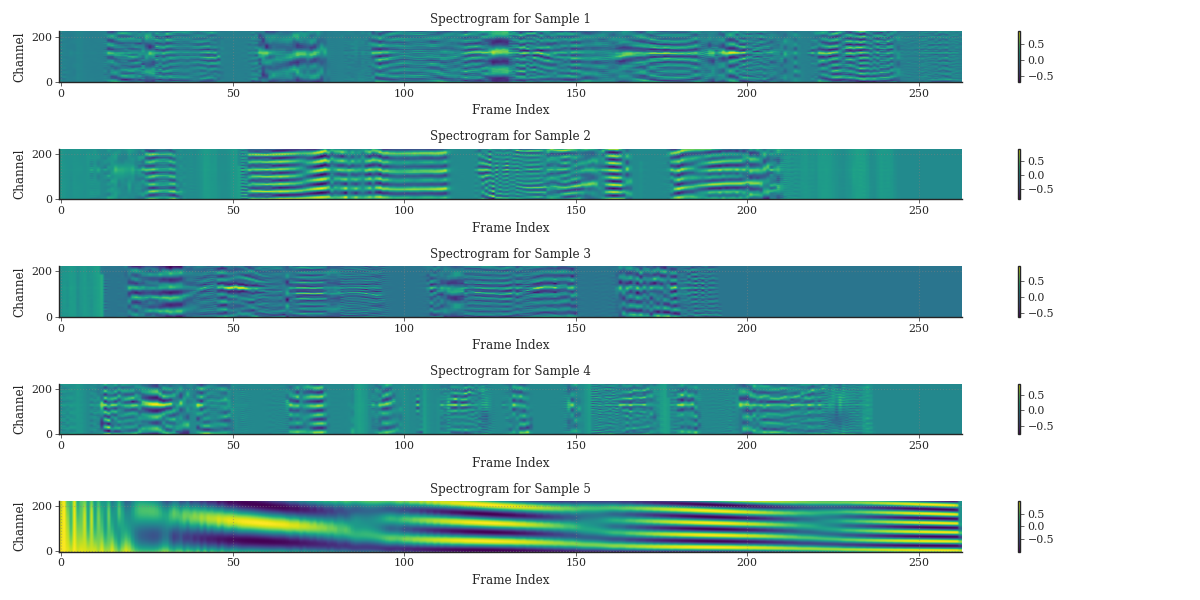

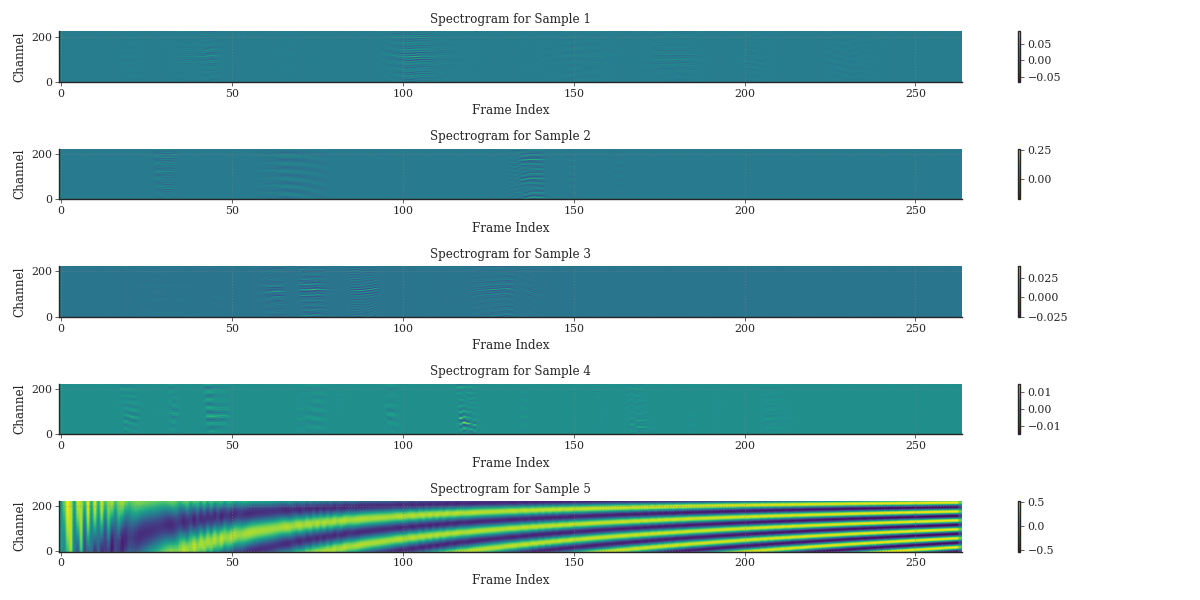

In [5]:
features_plot(features)
features_plot(xcorr)
